In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [217]:
state='SC'
sc_excel = pd.read_excel(r"C:\Users\david\OneDrive\Documents\GitHub\SPEOC-pt-1\Data\Post1790\SC\Post_1790_South_Carolina_CD.xlsx",
                             header=11, usecols='G, H, M, N, AB, AC, AQ, AR') 
sc_excel[['Cents', 'Cents.1', 'Cents.2']] = sc_excel[['Cents', 'Cents.1', 'Cents.2']].div(100)
sc_excel = sc_excel.loc[sc_excel['State'] == state]
sc_excel.drop('State', axis=1, inplace=True)
print(sc_excel)     

    Occupation  Dollars  Cents  Dollars.1  Cents.1  Dollars.2  Cents.2
1      Mariner     83.0   0.33       41.0     0.66       80.0     0.43
2     Merchant   1017.0   0.76      508.0     0.88      994.0     0.13
3     Merchant     33.0   0.34       16.0     0.66       30.0     0.65
4     Merchant    386.0   0.32      193.0     0.16      222.0     0.19
5    Physician    322.0   0.70      161.0     0.36      246.0     0.69
..         ...      ...    ...        ...      ...        ...      ...
401        NaN    800.0   0.00        NaN      NaN        NaN      NaN
402    Planter    104.0   0.78       52.0     0.39      113.0     0.96
421        NaN     84.0   0.13       42.0     0.07       88.0     0.48
426        NaN    242.0   0.67      121.0     0.33       79.0     0.52
427   Marriner    180.0   0.47       90.0     0.24      207.0     0.93

[315 rows x 7 columns]


In [218]:
def get_debt_no_job(occupations):
    no_occ = occupations[occupations['Occupation'].isna()] #query all people listed who have debt but no occupation listed
    no_occ_copy = no_occ.copy() #avoid settingcopywarning warning
    total = no_occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns    

    return total.to_frame(name='totals') #convert to more usable dataframe format

def get_debt_w_job(occupations):
    occ = occupations[occupations['Occupation'].notna()] #query all people listed who have debt with an occupation listed
    occ_copy = occ.copy() #avoid settingcopywarning warning
    total = occ_copy[['Dollars', 'Dollars.1', 'Dollars.2', 'Cents', 'Cents.1', 'Cents.2']].sum(axis=1) #find total with dollar and cents separate columns       
    
    return total.to_frame(name='totals.2') #convert to more usable dataframe format 

def plot(excel):
    no_occ = get_debt_no_job(sc_excel)['totals'].reset_index(drop=True) #get dataframe for people with no occupation listed       
    occ = get_debt_w_job(sc_excel)['totals.2'].reset_index(drop=True) #get dataframe for people with an occupation listed
    
    print(len(no_occ))
    print(len(occ))
    
    NoOccExcel = pd.read_excel('NoOccupation.xlsx')
    OccExcel = pd.read_excel('Occupation.xlsx')
    
    ConcatDfNoOcc = pd.concat([NoOccExcel, no_occ], ignore_index=True, axis=1)
    ConcatDfOcc = pd.concat([OccExcel, occ], ignore_index=True, axis=1)
    
    ConcatDfNoOcc.to_excel('NoOccupation.xlsx', index=False)
    ConcatDfOcc.to_excel('Occupation.xlsx', index=False)
    
    plt.hist(no_occ, color='skyblue', edgecolor='black', range=[0,4000], bins=50, label='Occupation Not Listed', weights=np.ones_like(no_occ) / len(no_occ)) #plot
    plt.hist(occ, color='red', edgecolor='black', range=[0,4000], bins=50, alpha=0.5, label='Occupation Listed', weights=np.ones_like(occ) / len(occ)) #plot
    title = "Comparing Debt Holdings of Individuals with Occupation Listed vs Individuals with no Occupation Listed (" + state + ")"
    plt.title(title) #add title
    plt.xlabel("Total Debt Held By an Individual in Dollars") #add x title
    plt.ylabel("Frequency") #add y title
    plt.legend() #add legend

51
264


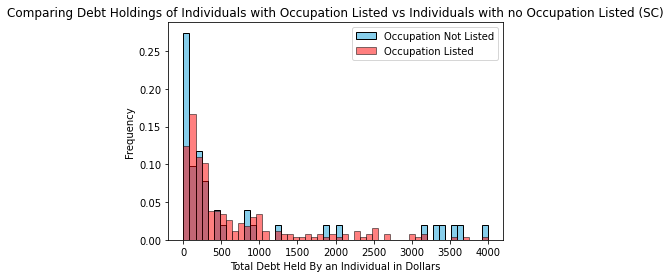

In [219]:
plot(sc_excel)